In [ ]:
import sys
import os
import platform
import importlib
import glob

import numpy as np
import pandas as pd
import datetime

if platform.system() == 'Darwin':  # macOS
    base_FP = '/Users/hyunglokkim/Insync/hkim@geol.sc.edu/Google_Drive'
    cpuserver_data_FP = '/Users/hyunglokkim/cpuserver_data'
else:
    base_FP = '/data'
    cpuserver_data_FP = '/data'
sys.path.append(base_FP + '/python_modules')

#hydroAI libs
import HydroAI.AMSR2_LPRM as hAMSR2_LPRM
import HydroAI.Grid as hGrid
import HydroAI.Plot as hPlot
import HydroAI.Data as hData
import HydroAI.Grid as hGrid
importlib.reload(hAMSR2_LPRM);
importlib.reload(hPlot);
importlib.reload(hData);
importlib.reload(hGrid);

# Ignore runtime warnings
import warnings
warnings.filterwarnings("ignore")

# Define your directory where to save nc files
nc_save_dir = cpuserver_data_FP + '/extracted_nc'

## 1. Import and save AMSR2 LPRM DS SM (10 km) or LPRM SM (25 km)

In [59]:
year = 2022
mission = 'AMSR2'
mission_product = 'LPRM' # 10 km SM data for 'LPRM_DS'
path = 'A'
directory = os.path.join(cpuserver_data_FP, mission, mission_product, path)
file_list, data_doy = hAMSR2_LPRM.extract_filelist_doy(directory, year) 
longitude, latitude = hGrid.generate_lon_lat_eqdgrid(0.25) # 0.1 for LPRM DS

In [58]:
# Examples (import SMOS-IC data with specific year and overpass time)
A2_SM_x = hAMSR2_LPRM.create_array_from_nc(file_list, data_doy, year, 'soil_moisture_x')*0.01
A2_SM_x = hAMSR2_LPRM.correct_shape(A2_SM_x)
A2_mask = hAMSR2_LPRM.create_array_from_nc(file_list, data_doy, year, 'mask')
A2_mask = hAMSR2_LPRM.correct_shape(A2_mask)

Processing files: 100%|███████████████████████| 364/364 [00:04<00:00, 88.73it/s]


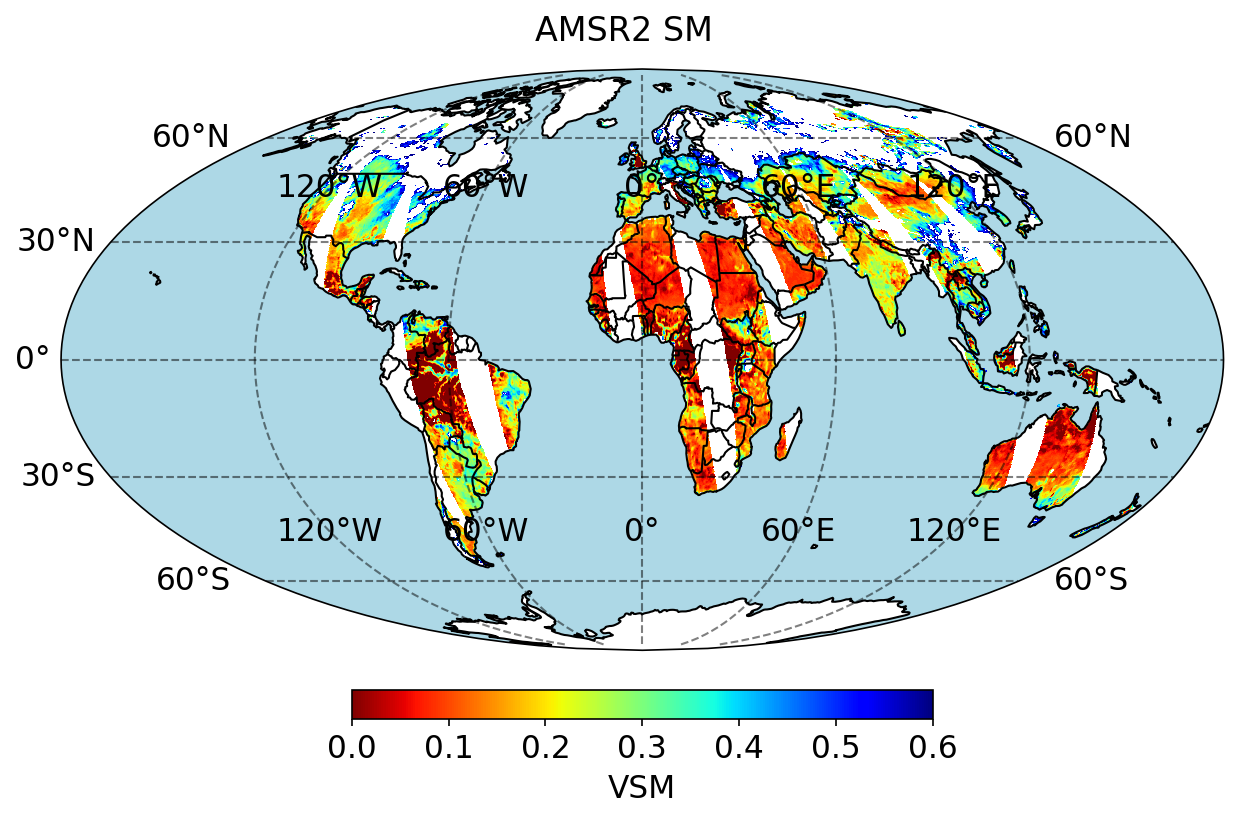

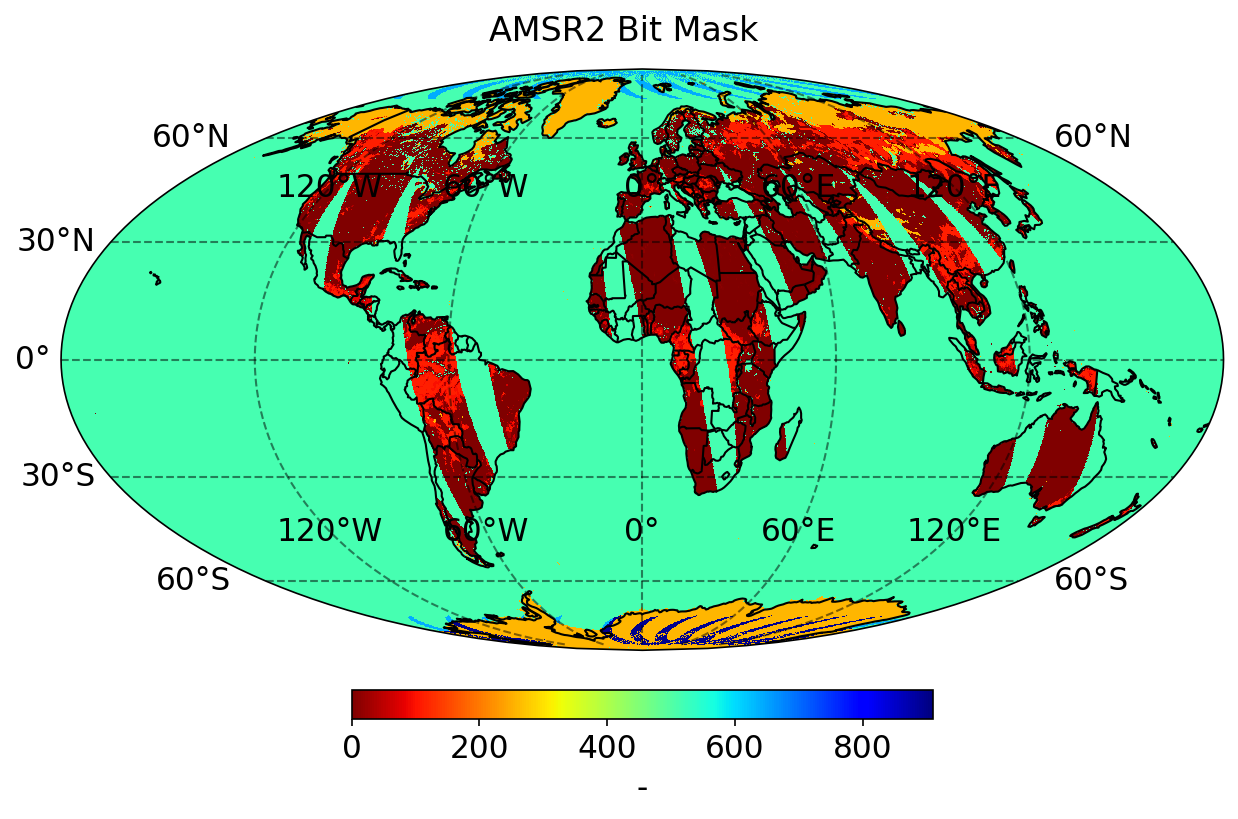

(<Figure size 1500x1500 with 2 Axes>, <GeoAxes: >)

In [60]:
# Check the imported data
doy = 300
target = A2_SM_x
target[(target < 0) | (target > 0.6)] = np.nan
hPlot.plot_map(longitude, latitude, target[:,:,doy], np.nanmin(target), np.nanmax(target), plot_title='AMSR2 SM', label_title='VSM', cmap='jet_r')
target = A2_mask
hPlot.plot_map(longitude, latitude, target[:,:,doy], np.nanmin(target), np.nanmax(target), plot_title='AMSR2 Bit Mask', label_title='-', cmap='jet_r')

In [ ]:
path_list = ['A', 'D'] # 1:30 PM Ascending / 1:30 AM Descending
for year in range(2012, 2024): 
    for path in path_list:
        print(year, path)
        directory = os.path.join(cpuserver_data_FP, mission, mission_product, path)
        file_list, data_doy = hAMSR2_LPRM.extract_filelist_doy(directory, year)

        # Import Variables
        A2_SM_x = hAMSR2_LPRM.correct_shape(hAMSR2_LPRM.create_array_from_nc(file_list, data_doy, year, 'soil_moisture_x'))
        A2_SM_x[A2_SM_x<=0] = np.nan
        A2_SM_c1 = hAMSR2_LPRM.correct_shape(hAMSR2_LPRM.create_array_from_nc(file_list, data_doy, year, 'soil_moisture_c1'))
        A2_SM_c1[A2_SM_c1<=0] = np.nan
        A2_SM_c2 = hAMSR2_LPRM.correct_shape(hAMSR2_LPRM.create_array_from_nc(file_list, data_doy, year, 'soil_moisture_c2'))
        A2_SM_c2[A2_SM_c2<=0] = np.nan
        A2_mask = hAMSR2_LPRM.correct_shape(hAMSR2_LPRM.create_array_from_nc(file_list, data_doy, year, 'mask'))

        # Create a NetCDF file
        path_time = 'am' if path == 'D' else 'pm'
        file_name = f'{mission}_{mission_product}_{year}_{path_time}.nc'
        nc_file_name = os.path.join(nc_save_dir, file_name)

        time_suffix = 'AM' if path == 'D' else 'PM'

        print(f"Saving: {nc_file_name}")
        hData.create_netcdf_file(
        nc_file=nc_file_name, 
        latitude=latitude, 
        longitude=longitude,
        **{f'A2_SM_x_{time_suffix}': A2_SM_x, 
           f'A2_SM_c1_{time_suffix}': A2_SM_c1, 
           f'A2_SM_c2_{time_suffix}': A2_SM_c2, 
           f'A2_mask_{time_suffix}': A2_mask})

        print(f"NetCDF file created: {nc_file_name}")

2012 A


Processing files: 100%|███████████████████████| 182/182 [00:02<00:00, 84.46it/s]


Saving: /Users/hyunglokkim/cpuserver_data/extracted_nc/AMSR2_LPRM_2012_pm.nc
NetCDF file /Users/hyunglokkim/cpuserver_data/extracted_nc/AMSR2_LPRM_2012_pm.nc created successfully.
NetCDF file created: /Users/hyunglokkim/cpuserver_data/extracted_nc/AMSR2_LPRM_2012_pm.nc
2012 D


Processing files: 100%|███████████████████████| 182/182 [00:02<00:00, 90.68it/s]


Saving: /Users/hyunglokkim/cpuserver_data/extracted_nc/AMSR2_LPRM_2012_am.nc
NetCDF file /Users/hyunglokkim/cpuserver_data/extracted_nc/AMSR2_LPRM_2012_am.nc created successfully.
NetCDF file created: /Users/hyunglokkim/cpuserver_data/extracted_nc/AMSR2_LPRM_2012_am.nc
2013 A


Processing files: 100%|███████████████████████| 362/362 [00:04<00:00, 88.97it/s]


Saving: /Users/hyunglokkim/cpuserver_data/extracted_nc/AMSR2_LPRM_2013_pm.nc
NetCDF file /Users/hyunglokkim/cpuserver_data/extracted_nc/AMSR2_LPRM_2013_pm.nc created successfully.
NetCDF file created: /Users/hyunglokkim/cpuserver_data/extracted_nc/AMSR2_LPRM_2013_pm.nc
2013 D


Processing files: 100%|███████████████████████| 362/362 [00:04<00:00, 90.43it/s]


Saving: /Users/hyunglokkim/cpuserver_data/extracted_nc/AMSR2_LPRM_2013_am.nc
NetCDF file /Users/hyunglokkim/cpuserver_data/extracted_nc/AMSR2_LPRM_2013_am.nc created successfully.
NetCDF file created: /Users/hyunglokkim/cpuserver_data/extracted_nc/AMSR2_LPRM_2013_am.nc
2014 A


Processing files: 100%|███████████████████████| 365/365 [00:04<00:00, 89.64it/s]


Saving: /Users/hyunglokkim/cpuserver_data/extracted_nc/AMSR2_LPRM_2014_pm.nc
NetCDF file /Users/hyunglokkim/cpuserver_data/extracted_nc/AMSR2_LPRM_2014_pm.nc created successfully.
NetCDF file created: /Users/hyunglokkim/cpuserver_data/extracted_nc/AMSR2_LPRM_2014_pm.nc
2014 D


Processing files: 100%|███████████████████████| 365/365 [00:03<00:00, 91.66it/s]


Saving: /Users/hyunglokkim/cpuserver_data/extracted_nc/AMSR2_LPRM_2014_am.nc
NetCDF file /Users/hyunglokkim/cpuserver_data/extracted_nc/AMSR2_LPRM_2014_am.nc created successfully.
NetCDF file created: /Users/hyunglokkim/cpuserver_data/extracted_nc/AMSR2_LPRM_2014_am.nc
2015 A


Processing files: 100%|███████████████████████| 365/365 [00:04<00:00, 90.23it/s]


Saving: /Users/hyunglokkim/cpuserver_data/extracted_nc/AMSR2_LPRM_2015_pm.nc
NetCDF file /Users/hyunglokkim/cpuserver_data/extracted_nc/AMSR2_LPRM_2015_pm.nc created successfully.
NetCDF file created: /Users/hyunglokkim/cpuserver_data/extracted_nc/AMSR2_LPRM_2015_pm.nc
2015 D


Processing files: 100%|███████████████████████| 365/365 [00:04<00:00, 85.69it/s]


Saving: /Users/hyunglokkim/cpuserver_data/extracted_nc/AMSR2_LPRM_2015_am.nc
NetCDF file /Users/hyunglokkim/cpuserver_data/extracted_nc/AMSR2_LPRM_2015_am.nc created successfully.
NetCDF file created: /Users/hyunglokkim/cpuserver_data/extracted_nc/AMSR2_LPRM_2015_am.nc
2016 A


Processing files: 100%|███████████████████████| 366/366 [00:04<00:00, 89.91it/s]


Saving: /Users/hyunglokkim/cpuserver_data/extracted_nc/AMSR2_LPRM_2016_pm.nc
NetCDF file /Users/hyunglokkim/cpuserver_data/extracted_nc/AMSR2_LPRM_2016_pm.nc created successfully.
NetCDF file created: /Users/hyunglokkim/cpuserver_data/extracted_nc/AMSR2_LPRM_2016_pm.nc
2016 D


Processing files: 100%|███████████████████████| 366/366 [00:04<00:00, 87.15it/s]


Saving: /Users/hyunglokkim/cpuserver_data/extracted_nc/AMSR2_LPRM_2016_am.nc


## 2. Resample AMSR2 LPRM data (with QC)
Masked data if one of the following conditions was met (Kim et al. (2023)):
1) SM was smaller than 0 cm3cm− 3 higher than 0.60 cm3cm− 3
2) the Tb-RMSE flag values were larger than 5 K.
3) or the science flag was greater than one,

In [36]:
target_projection = 'Noah_025'
SMOS_lon, SMOS_lat = hGrid.generate_lon_lat_e2grid('25km')
domain_lon, domain_lat = hGrid.generate_lon_lat_eqdgrid(0.25)

domain_lon = domain_lon[:600, :]
domain_lat = domain_lat[:600, :]

path_list = ['am', 'pm']
for year in range(2010, 2024):
    
    for path in path_list:
        time_suffix = 'AM' if path == 'am' else 'PM'
        # resample SMOS into the doamin size
        nc_file  = nc_save_dir+'/SMOS_IC_'+str(year)+'_'+path+'.nc'
        print(nc_file)
        nc_data  = netCDF4.Dataset(nc_file)
        SMOS_SM  = nc_data.variables['SMOS_SM_'+time_suffix][:].data
        
        SMOS_SM_QC = SMOS_SM.copy()
        SMOS_RFI = nc_data.variables['SMOS_RFI_'+time_suffix][:].data
        SMOS_SF  = nc_data.variables['SMOS_SF_'+time_suffix][:].data
        nc_data.close()

        # Masking data
        SMOS_SM_QC[(SMOS_SM <= 0) | (SMOS_SM > 0.6)] = np.nan
        SMOS_SM_QC[SMOS_RFI > 5] = np.nan
        SMOS_SM_QC[SMOS_SF  > 1] = np.nan
        
        Resampled_SMOS_SM    = hData.Resampling_forloop(domain_lon, domain_lat, SMOS_lon, SMOS_lat, SMOS_SM)
        Resampled_SMOS_SM_QC = hData.Resampling_forloop(domain_lon, domain_lat, SMOS_lon, SMOS_lat, SMOS_SM_QC)
        file_name = 'SMOS_IC_'+str(year)+'_'+path+'_R_'+target_projection+'.nc'
        nc_file_name = nc_save_dir+'/'+file_name
        
        print(f"Saving: {nc_file}")
        hData.create_netcdf_file(
        nc_file    = nc_file_name,
        latitude   = domain_lat,
        longitude  = domain_lon,
        Resampled_SMOS_SM    = Resampled_SMOS_SM,
        Resampled_SMOS_SM_QC = Resampled_SMOS_SM_QC)

        print(f"NetCDF file created: {nc_file}")

Processing row 0/584
Processing row 100/584
Processing row 200/584
Processing row 300/584
Processing row 400/584
Processing row 500/584
/Users/hyunglokkim/cpuserver_data/extracted_nc/SMOS_IC_2011_am.nc


100%|█████████████████████████████████████████| 366/366 [02:22<00:00,  2.56it/s]


Saving: /Users/hyunglokkim/cpuserver_data/extracted_nc/SMOS_IC_2011_am.nc
NetCDF file /Users/hyunglokkim/cpuserver_data/extracted_nc/SMOS_IC_2011_am_R_Noah_025.nc created successfully.
NetCDF file created: /Users/hyunglokkim/cpuserver_data/extracted_nc/SMOS_IC_2011_am.nc
/Users/hyunglokkim/cpuserver_data/extracted_nc/SMOS_IC_2011_pm.nc


100%|█████████████████████████████████████████| 366/366 [02:22<00:00,  2.57it/s]


Saving: /Users/hyunglokkim/cpuserver_data/extracted_nc/SMOS_IC_2011_pm.nc
NetCDF file /Users/hyunglokkim/cpuserver_data/extracted_nc/SMOS_IC_2011_pm_R_Noah_025.nc created successfully.
NetCDF file created: /Users/hyunglokkim/cpuserver_data/extracted_nc/SMOS_IC_2011_pm.nc
/Users/hyunglokkim/cpuserver_data/extracted_nc/SMOS_IC_2012_am.nc


100%|█████████████████████████████████████████| 367/367 [02:22<00:00,  2.57it/s]


Saving: /Users/hyunglokkim/cpuserver_data/extracted_nc/SMOS_IC_2012_am.nc
NetCDF file /Users/hyunglokkim/cpuserver_data/extracted_nc/SMOS_IC_2012_am_R_Noah_025.nc created successfully.
NetCDF file created: /Users/hyunglokkim/cpuserver_data/extracted_nc/SMOS_IC_2012_am.nc
/Users/hyunglokkim/cpuserver_data/extracted_nc/SMOS_IC_2012_pm.nc


100%|█████████████████████████████████████████| 367/367 [02:22<00:00,  2.58it/s]


Saving: /Users/hyunglokkim/cpuserver_data/extracted_nc/SMOS_IC_2012_pm.nc
NetCDF file /Users/hyunglokkim/cpuserver_data/extracted_nc/SMOS_IC_2012_pm_R_Noah_025.nc created successfully.
NetCDF file created: /Users/hyunglokkim/cpuserver_data/extracted_nc/SMOS_IC_2012_pm.nc
/Users/hyunglokkim/cpuserver_data/extracted_nc/SMOS_IC_2013_am.nc


100%|█████████████████████████████████████████| 366/366 [02:22<00:00,  2.57it/s]


Saving: /Users/hyunglokkim/cpuserver_data/extracted_nc/SMOS_IC_2013_am.nc
NetCDF file /Users/hyunglokkim/cpuserver_data/extracted_nc/SMOS_IC_2013_am_R_Noah_025.nc created successfully.
NetCDF file created: /Users/hyunglokkim/cpuserver_data/extracted_nc/SMOS_IC_2013_am.nc
/Users/hyunglokkim/cpuserver_data/extracted_nc/SMOS_IC_2013_pm.nc


100%|█████████████████████████████████████████| 366/366 [02:22<00:00,  2.57it/s]


Saving: /Users/hyunglokkim/cpuserver_data/extracted_nc/SMOS_IC_2013_pm.nc
NetCDF file /Users/hyunglokkim/cpuserver_data/extracted_nc/SMOS_IC_2013_pm_R_Noah_025.nc created successfully.
NetCDF file created: /Users/hyunglokkim/cpuserver_data/extracted_nc/SMOS_IC_2013_pm.nc
/Users/hyunglokkim/cpuserver_data/extracted_nc/SMOS_IC_2014_am.nc


100%|█████████████████████████████████████████| 366/366 [02:21<00:00,  2.58it/s]


Saving: /Users/hyunglokkim/cpuserver_data/extracted_nc/SMOS_IC_2014_am.nc
NetCDF file /Users/hyunglokkim/cpuserver_data/extracted_nc/SMOS_IC_2014_am_R_Noah_025.nc created successfully.
NetCDF file created: /Users/hyunglokkim/cpuserver_data/extracted_nc/SMOS_IC_2014_am.nc
/Users/hyunglokkim/cpuserver_data/extracted_nc/SMOS_IC_2014_pm.nc


100%|█████████████████████████████████████████| 366/366 [02:21<00:00,  2.58it/s]


Saving: /Users/hyunglokkim/cpuserver_data/extracted_nc/SMOS_IC_2014_pm.nc
NetCDF file /Users/hyunglokkim/cpuserver_data/extracted_nc/SMOS_IC_2014_pm_R_Noah_025.nc created successfully.
NetCDF file created: /Users/hyunglokkim/cpuserver_data/extracted_nc/SMOS_IC_2014_pm.nc
/Users/hyunglokkim/cpuserver_data/extracted_nc/SMOS_IC_2015_am.nc


100%|█████████████████████████████████████████| 366/366 [02:22<00:00,  2.57it/s]


Saving: /Users/hyunglokkim/cpuserver_data/extracted_nc/SMOS_IC_2015_am.nc
NetCDF file /Users/hyunglokkim/cpuserver_data/extracted_nc/SMOS_IC_2015_am_R_Noah_025.nc created successfully.
NetCDF file created: /Users/hyunglokkim/cpuserver_data/extracted_nc/SMOS_IC_2015_am.nc
/Users/hyunglokkim/cpuserver_data/extracted_nc/SMOS_IC_2015_pm.nc


100%|█████████████████████████████████████████| 366/366 [02:20<00:00,  2.61it/s]


Saving: /Users/hyunglokkim/cpuserver_data/extracted_nc/SMOS_IC_2015_pm.nc
NetCDF file /Users/hyunglokkim/cpuserver_data/extracted_nc/SMOS_IC_2015_pm_R_Noah_025.nc created successfully.
NetCDF file created: /Users/hyunglokkim/cpuserver_data/extracted_nc/SMOS_IC_2015_pm.nc
/Users/hyunglokkim/cpuserver_data/extracted_nc/SMOS_IC_2016_am.nc


100%|█████████████████████████████████████████| 367/367 [02:20<00:00,  2.62it/s]


Saving: /Users/hyunglokkim/cpuserver_data/extracted_nc/SMOS_IC_2016_am.nc
NetCDF file /Users/hyunglokkim/cpuserver_data/extracted_nc/SMOS_IC_2016_am_R_Noah_025.nc created successfully.
NetCDF file created: /Users/hyunglokkim/cpuserver_data/extracted_nc/SMOS_IC_2016_am.nc
/Users/hyunglokkim/cpuserver_data/extracted_nc/SMOS_IC_2016_pm.nc


100%|█████████████████████████████████████████| 367/367 [02:21<00:00,  2.59it/s]


Saving: /Users/hyunglokkim/cpuserver_data/extracted_nc/SMOS_IC_2016_pm.nc
NetCDF file /Users/hyunglokkim/cpuserver_data/extracted_nc/SMOS_IC_2016_pm_R_Noah_025.nc created successfully.
NetCDF file created: /Users/hyunglokkim/cpuserver_data/extracted_nc/SMOS_IC_2016_pm.nc
/Users/hyunglokkim/cpuserver_data/extracted_nc/SMOS_IC_2017_am.nc


100%|█████████████████████████████████████████| 366/366 [02:21<00:00,  2.58it/s]


Saving: /Users/hyunglokkim/cpuserver_data/extracted_nc/SMOS_IC_2017_am.nc
NetCDF file /Users/hyunglokkim/cpuserver_data/extracted_nc/SMOS_IC_2017_am_R_Noah_025.nc created successfully.
NetCDF file created: /Users/hyunglokkim/cpuserver_data/extracted_nc/SMOS_IC_2017_am.nc
/Users/hyunglokkim/cpuserver_data/extracted_nc/SMOS_IC_2017_pm.nc


100%|█████████████████████████████████████████| 366/366 [02:21<00:00,  2.58it/s]


Saving: /Users/hyunglokkim/cpuserver_data/extracted_nc/SMOS_IC_2017_pm.nc
NetCDF file /Users/hyunglokkim/cpuserver_data/extracted_nc/SMOS_IC_2017_pm_R_Noah_025.nc created successfully.
NetCDF file created: /Users/hyunglokkim/cpuserver_data/extracted_nc/SMOS_IC_2017_pm.nc
/Users/hyunglokkim/cpuserver_data/extracted_nc/SMOS_IC_2018_am.nc


100%|█████████████████████████████████████████| 366/366 [02:21<00:00,  2.59it/s]


Saving: /Users/hyunglokkim/cpuserver_data/extracted_nc/SMOS_IC_2018_am.nc
NetCDF file /Users/hyunglokkim/cpuserver_data/extracted_nc/SMOS_IC_2018_am_R_Noah_025.nc created successfully.
NetCDF file created: /Users/hyunglokkim/cpuserver_data/extracted_nc/SMOS_IC_2018_am.nc
/Users/hyunglokkim/cpuserver_data/extracted_nc/SMOS_IC_2018_pm.nc


100%|█████████████████████████████████████████| 366/366 [02:21<00:00,  2.59it/s]


Saving: /Users/hyunglokkim/cpuserver_data/extracted_nc/SMOS_IC_2018_pm.nc
NetCDF file /Users/hyunglokkim/cpuserver_data/extracted_nc/SMOS_IC_2018_pm_R_Noah_025.nc created successfully.
NetCDF file created: /Users/hyunglokkim/cpuserver_data/extracted_nc/SMOS_IC_2018_pm.nc
/Users/hyunglokkim/cpuserver_data/extracted_nc/SMOS_IC_2019_am.nc


100%|█████████████████████████████████████████| 366/366 [02:21<00:00,  2.58it/s]


Saving: /Users/hyunglokkim/cpuserver_data/extracted_nc/SMOS_IC_2019_am.nc
NetCDF file /Users/hyunglokkim/cpuserver_data/extracted_nc/SMOS_IC_2019_am_R_Noah_025.nc created successfully.
NetCDF file created: /Users/hyunglokkim/cpuserver_data/extracted_nc/SMOS_IC_2019_am.nc
/Users/hyunglokkim/cpuserver_data/extracted_nc/SMOS_IC_2019_pm.nc


100%|█████████████████████████████████████████| 366/366 [02:21<00:00,  2.58it/s]


Saving: /Users/hyunglokkim/cpuserver_data/extracted_nc/SMOS_IC_2019_pm.nc
NetCDF file /Users/hyunglokkim/cpuserver_data/extracted_nc/SMOS_IC_2019_pm_R_Noah_025.nc created successfully.
NetCDF file created: /Users/hyunglokkim/cpuserver_data/extracted_nc/SMOS_IC_2019_pm.nc
/Users/hyunglokkim/cpuserver_data/extracted_nc/SMOS_IC_2020_am.nc


100%|█████████████████████████████████████████| 367/367 [02:21<00:00,  2.58it/s]


Saving: /Users/hyunglokkim/cpuserver_data/extracted_nc/SMOS_IC_2020_am.nc
NetCDF file /Users/hyunglokkim/cpuserver_data/extracted_nc/SMOS_IC_2020_am_R_Noah_025.nc created successfully.
NetCDF file created: /Users/hyunglokkim/cpuserver_data/extracted_nc/SMOS_IC_2020_am.nc
/Users/hyunglokkim/cpuserver_data/extracted_nc/SMOS_IC_2020_pm.nc


100%|█████████████████████████████████████████| 367/367 [02:22<00:00,  2.58it/s]


Saving: /Users/hyunglokkim/cpuserver_data/extracted_nc/SMOS_IC_2020_pm.nc
NetCDF file /Users/hyunglokkim/cpuserver_data/extracted_nc/SMOS_IC_2020_pm_R_Noah_025.nc created successfully.
NetCDF file created: /Users/hyunglokkim/cpuserver_data/extracted_nc/SMOS_IC_2020_pm.nc
/Users/hyunglokkim/cpuserver_data/extracted_nc/SMOS_IC_2021_am.nc


100%|█████████████████████████████████████████| 366/366 [02:21<00:00,  2.59it/s]


Saving: /Users/hyunglokkim/cpuserver_data/extracted_nc/SMOS_IC_2021_am.nc
NetCDF file /Users/hyunglokkim/cpuserver_data/extracted_nc/SMOS_IC_2021_am_R_Noah_025.nc created successfully.
NetCDF file created: /Users/hyunglokkim/cpuserver_data/extracted_nc/SMOS_IC_2021_am.nc
/Users/hyunglokkim/cpuserver_data/extracted_nc/SMOS_IC_2021_pm.nc


100%|█████████████████████████████████████████| 366/366 [02:21<00:00,  2.58it/s]


Saving: /Users/hyunglokkim/cpuserver_data/extracted_nc/SMOS_IC_2021_pm.nc
NetCDF file /Users/hyunglokkim/cpuserver_data/extracted_nc/SMOS_IC_2021_pm_R_Noah_025.nc created successfully.
NetCDF file created: /Users/hyunglokkim/cpuserver_data/extracted_nc/SMOS_IC_2021_pm.nc
/Users/hyunglokkim/cpuserver_data/extracted_nc/SMOS_IC_2022_am.nc


100%|█████████████████████████████████████████| 366/366 [02:22<00:00,  2.58it/s]


Saving: /Users/hyunglokkim/cpuserver_data/extracted_nc/SMOS_IC_2022_am.nc
NetCDF file /Users/hyunglokkim/cpuserver_data/extracted_nc/SMOS_IC_2022_am_R_Noah_025.nc created successfully.
NetCDF file created: /Users/hyunglokkim/cpuserver_data/extracted_nc/SMOS_IC_2022_am.nc
/Users/hyunglokkim/cpuserver_data/extracted_nc/SMOS_IC_2022_pm.nc


100%|█████████████████████████████████████████| 366/366 [02:21<00:00,  2.58it/s]


Saving: /Users/hyunglokkim/cpuserver_data/extracted_nc/SMOS_IC_2022_pm.nc
NetCDF file /Users/hyunglokkim/cpuserver_data/extracted_nc/SMOS_IC_2022_pm_R_Noah_025.nc created successfully.
NetCDF file created: /Users/hyunglokkim/cpuserver_data/extracted_nc/SMOS_IC_2022_pm.nc
/Users/hyunglokkim/cpuserver_data/extracted_nc/SMOS_IC_2023_am.nc


100%|█████████████████████████████████████████| 366/366 [02:21<00:00,  2.59it/s]


Saving: /Users/hyunglokkim/cpuserver_data/extracted_nc/SMOS_IC_2023_am.nc
NetCDF file /Users/hyunglokkim/cpuserver_data/extracted_nc/SMOS_IC_2023_am_R_Noah_025.nc created successfully.
NetCDF file created: /Users/hyunglokkim/cpuserver_data/extracted_nc/SMOS_IC_2023_am.nc
/Users/hyunglokkim/cpuserver_data/extracted_nc/SMOS_IC_2023_pm.nc


100%|█████████████████████████████████████████| 366/366 [02:21<00:00,  2.59it/s]


Saving: /Users/hyunglokkim/cpuserver_data/extracted_nc/SMOS_IC_2023_pm.nc
NetCDF file /Users/hyunglokkim/cpuserver_data/extracted_nc/SMOS_IC_2023_pm_R_Noah_025.nc created successfully.
NetCDF file created: /Users/hyunglokkim/cpuserver_data/extracted_nc/SMOS_IC_2023_pm.nc


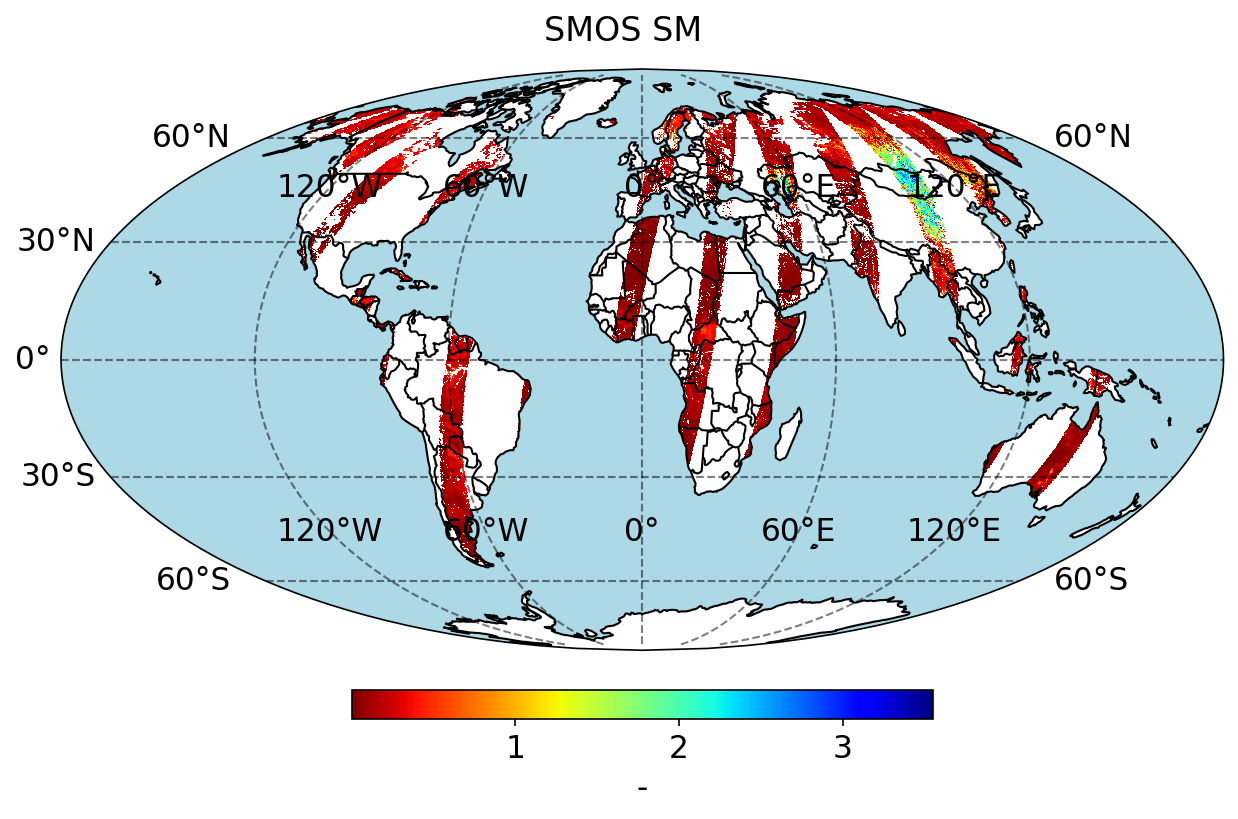

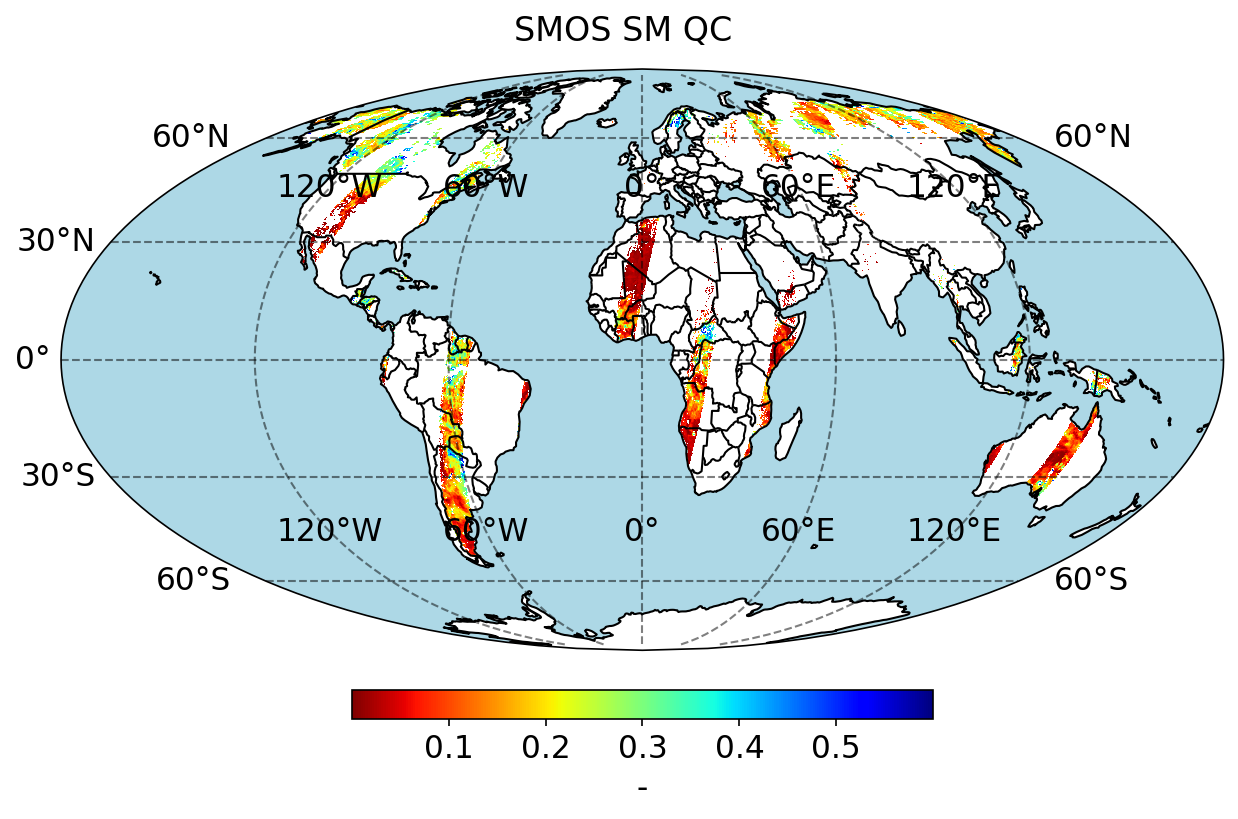

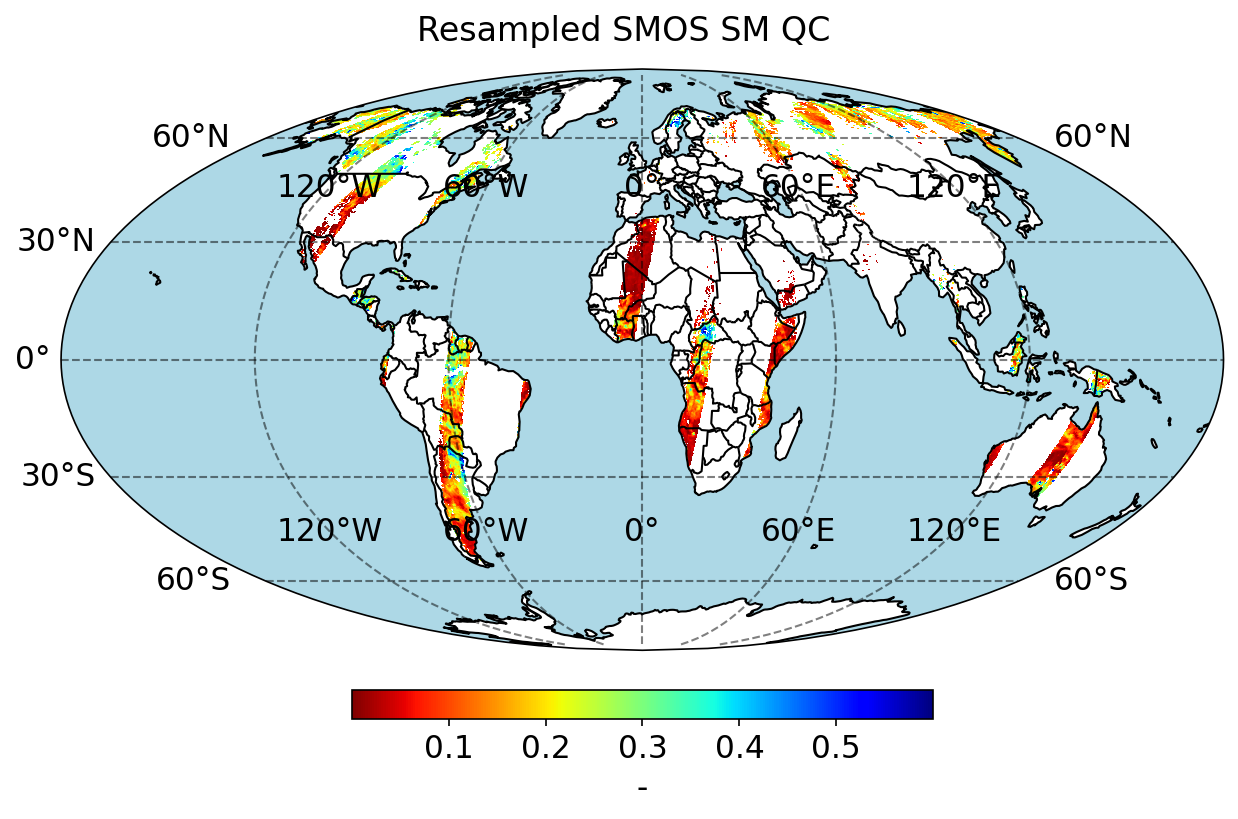

(<Figure size 1500x1500 with 2 Axes>, <GeoAxes: >)

In [35]:
doy = 150
target = SMOS_SM[:,:, doy]
hPlot.plot_map(SMOS_lon, SMOS_lat, target, np.nanmin(target), np.nanmax(target), plot_title='SMOS SM', label_title='-', cmap='jet_r')
target = SMOS_SM_QC[:,:,doy]
hPlot.plot_map(SMOS_lon, SMOS_lat, target, np.nanmin(target), np.nanmax(target), plot_title='SMOS SM QC', label_title='-', cmap='jet_r')
target = Resampled_SMOS_SM_QC[:,:,doy]
hPlot.plot_map(domain_lon, domain_lat, target, np.nanmin(target), np.nanmax(target), plot_title='Resampled SMOS SM QC', label_title='-', cmap='jet_r')